# DSE 207R FINAL PROJECT
## Fall 2023
### Due Date:  December 12th, 2023

The final project is a guided project for you to build your own end-to-end analysis using Python, especially using what you learned on Python _numpy_, _pandas_, _matplotlib_/_seaborn_ and _scilitlearn_ libraries.

This project is culmination of all you’ve learned in this course! You should expect to spend <b>24-32 total hours</b> on the project. Be sure to read all of the items below before starting. Make sure to follow Slack for any updates on the final project.

# <b>Deliverables</b>:
The final project has 2 submissions - a report(this notebook) and an presentation video(self recorded). You will be evaluated on both the components.

## 1. Report (this notebook)
Submit the notebook via Gradescope by midnight on the due date above along with clear instructions on how to download the datasets you used for and reproduce your results. You can host the dataset(on github) such that it can be used as a url directly. Don't forget to add your name on top as the author of the notebook.



# <span style = "color:red;"> Instructions </span>
1. Download wine dataset from this Kaggle page: https://www.kaggle.com/datasets/zynicide/wine-reviews/data?select=winemag-data-130k-v2.csv \
$\rightarrow$ I will be using the dataset named `winemag-data-130k-v2.csv`
2. Download climate dataset from this Kaggle page: https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset?select=climate_change_data.csv \
$\rightarrow$ The dataset is named `climate_change_data.csv`
3. Save them to the same directory of this project file
4. I didn't rename the files so everything should work

There are a number of steps outlined below, but is critical that you do not view this as an entirely linear process.  Remember that the science component in data science is the creation of a hypothesis based on exploration and testing of that hypothesis through analysis.  You may need to go through many of these steps multiple times before you arrive at meaningful hypothesis or conclusions.

### Step 1: Find a dataset or datasets

1.1. **Based on your interest, identify a dataset which you will want to examine.**  You will find a starting point for where you can find open datasets at the end of this notebook, but feel free to use other datasets you have access to and can publicly share results about.


This step may take some time, as you’ll likely look at a number of datasets before you find one (or more) which holds promising data for the kinds of questions you want to ask.

Below are some resources but you are not limited to them -

UCI's Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets.php <br>
Kaggle: https://www.kaggle.com/datasets <br>
KDnuggets Dataset: http://www.kdnuggets.com/datasets/index.html <br>
government data (http://www.kdnuggets.com/datasets/government-local-public.html) <br>
Data APIs (http://www.kdnuggets.com/datasets/api-hub-marketplace-platform.html <br>
Data Mining Competitions (http://www.kdnuggets.com/competitions/index.html <br>
US Government Data: https://www.data.gov/ <br>
UK Government Data: https://data.gov.uk/ <br>
Canada's Open Data Exchange: https://codx.ca/ <br>
World Health Organization: http://www.who.int/gho/en <br>
World Bank: http://data.worldbank.org/ <br>

Remember! Finding a dataset of interest and exploring it is most of your job for your final project. So expect this to take some time - and that's both perfectly normal and completely okay. Get started early and make sure to check if the dataset you find satisfies the project requirements.
<br>

<br>

1.2. **Once selected, explain the choice of dataset and why you want to work with it.**

In [1]:
# Import needed libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import FunctionTransformer
from imblearn.pipeline import Pipeline
# Set style of plots
sns.set_style("whitegrid")

## Wine Data
I wanted to work on some dataset that had reviews or text so I could conduct sentinent analysis with the text. Topics like movie reviews, product reviews, or poems don't interest me, therefore I chose a wine review dataset that contained wine descriptions because I like wine. It sounds interesting to conduct sentinent analysis on the description and connect the results to possibly the points given, or the price of the wine. I would expect a more positive description to have higher points and price. This dataset also contained country column which states the country the wine is from, this could be a good place to connect to other country dataset to conduct interesting experiments that involves country characteristics and wine characteristics.

In [2]:
# Save file name
wine_file = "winemag-data-130k-v2.csv"
# Read wine data
wine = pd.read_csv(wine_file, index_col = 0)

### Columns
1. **<span style = "color:cornflowerblue;"> country </span>**: The country that the wine is from
2. **<span style = "color:cornflowerblue;"> description </span>**: The wine review from the wine tester
3. **<span style = "color:cornflowerblue;"> designation </span>**: The name of the vineyard in the winery for the grapes that made the wine
4. **<span style = "color:cornflowerblue;"> points </span>**: The points the wine tester gave to the wine
5. **<span style = "color:cornflowerblue;"> price </span>**: The cost of a bottle of wine
6. **<span style = "color:cornflowerblue;"> province </span>**: The province/state that the wine is from
7. **<span style = "color:cornflowerblue;"> region_1 </span>**: The region within the province/state that the wine is from
8. **<span style = "color:cornflowerblue;"> region_2 </span>**: The more specific region that the wine is from
9. **<span style = "color:cornflowerblue;"> tester_name </span>**: The name of the wine tester
10. **<span style = "color:cornflowerblue;"> taster_twitter_handle </span>**: The wine tester's twitter
11. **<span style = "color:cornflowerblue;"> title </span>**: The name of the wine
12. **<span style = "color:cornflowerblue;"> variety </span>**: The type of the grape used to make the wine
13. **<span style = "color:cornflowerblue;"> winery </span>**: The winery that made the wine

In [3]:
# Look at wine data
wine.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Climate Data
I mentioned that I wanted to connect wine data to country data, therefore I though that country climate data would connect with wine data nicely, since a country's climate could affect the quality or taste of wine. Therefore I chose a dataset that contained country climates, I could assess how a country's characteristic such as temperature, humidity, or wind speed can affect the wine they produce. It seems relevant because climate is related to agriculture and wine is made from grapes.

In [4]:
# Save file name
climate_file = "climate_change_data.csv"
# Read climate data
climate = pd.read_csv(climate_file)

### Columns
1. **<span style = "color:cornflowerblue;"> Date </span>**: The date that the climate data was taken
2. **<span style = "color:cornflowerblue;"> Location </span>**: The location where the climate data is recorded
3. **<span style = "color:cornflowerblue;"> Country </span>**: The country for the climate data
4. **<span style = "color:cornflowerblue;"> Temperature </span>**: The average temperature measured in celcius
5. **<span style = "color:cornflowerblue;"> CO2 Emissions </span>**: The level of carbon dioxide emissions measured in parts per million
6. **<span style = "color:cornflowerblue;"> Sea Level Rise </span>**: The rise in sea level measured in millimeters
7. **<span style = "color:cornflowerblue;"> Precipitation </span>**: The amount of rainfall in millimeters
8. **<span style = "color:cornflowerblue;"> Humidity </span>**: The relative humidity in percentage
9. **<span style = "color:cornflowerblue;"> Wind Speed </span>**: The speed of wind in kilometers per hour

In [5]:
# Look at climate data
climate.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


### Step 2: Explore the datasets

In this step, you should explore what is present in the data and how the data is organized.

You are expected to answer the following questions using the _pandas_ library and markdown cells to describe your actions:

* Are there quality issues in the dataset (noisy, missing data, etc.)?
* What will you need to do to clean and/or transform the raw data for analysis?

You can also visually explore the datasets and explain your findings, specifically,

* How are the data distributed?
* What are some common trends?
* What are the relationships between variables in your dataset?

# Explore Wine Data

In [6]:
# Get dimensions
wine.shape

(129971, 13)

* There is about 130k rows and 13 columns, each row representing one wine

In [7]:
# Look at basic stats
wine.describe()

,points,price
count,129971.000000,120975.000000
mean,88.447138,35.363389
std,3.039730,41.022218
min,80.000000,4.000000
25%,86.000000,17.000000
50%,88.000000,25.000000
75%,91.000000,42.000000
max,100.000000,3300.000000


* `Points` range from 80 to 100, looks normally distributed
* `Price` is widely ranged from 4 to 3300 and is skewed to the right due to the mean being low compared to the max \
$\rightarrow$ But this is normal becuase there exists wine that are extrmeley expensive
* Don't see any issues with the data

### Look at Data with Plots

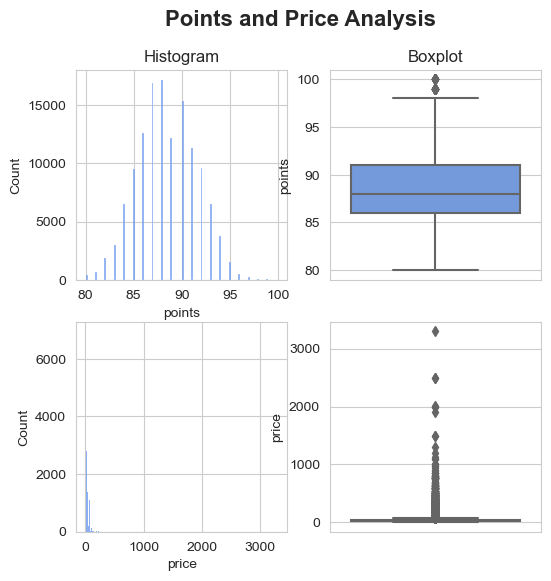

In [8]:
# Initialize subplot
fig, axes = plt.subplots(2, 2, figsize = (6, 6))
# Plot histogram of points
sns.histplot(data = wine.points, ax = axes[0, 0], color = "cornflowerblue")
# Plot boxplot of points
sns.boxplot(y = wine.points, ax = axes[0, 1], color = "cornflowerblue")
# Plot histogram of price
sns.histplot(data = wine.price, ax = axes[1, 0], color = "cornflowerblue")
# Plot boxplot of price
sns.boxplot(y = wine.price, ax = axes[1, 1], color = "cornflowerblue")
# Set titles
plt.suptitle('Points and Price Analysis', fontsize = 16, fontweight = 'bold')
axes[0, 0].set_title('Histogram')
axes[0, 1].set_title('Boxplot')
# Show plot
plt.show()

* As we have seen with `describe()`, `points` is roughly normally distrubuted with only few outliers at the high end, although they are outliers they are not bad data becuase points are out of 100
* We also expected that `price` is extrmemely skewed to the right due to some wine being highly priced, although there are many outliers, they are also not bad data because I recognize that some wine may be much more expensive than others, and that they are comparably rare and exoctic therefor the outliers makes sense \
$\rightarrow$ Therefore there is no need to perform actions on these outliers because they are expected behavior

In [9]:
# Look at basic information of dataset
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


* Since I am only discussing the quality and taste of wine as well as its relevance to `country`, I will filter my dataset so that it only contains relevant columns

In [10]:
# Filter to only columns needed
wine_data = wine[["country", "description", "points", "price", "title"]]
# Look at dataset
wine_data.head()

,country,description,points,price,title
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Nicosia 2013 Vulkà Bianco (Etna)
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro)
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley)
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...


### Take care of missing values

In [11]:
# Get number of null values from each column
wine_data.isnull().sum()

country          63
description       0
points            0
price          8996
title             0
dtype: int64

* Since there are only 63 rows with `country` column missing and there are 130k rows total, I assume that removing these columns would not cause bias and skew my data

In [12]:
# Filter again removing rows with null in country
wine_data = wine_data[wine_data.country.notna()]
# See if fixed by counting nulls again
wine_data.isnull().sum()

country           0
description       0
points            0
price          8992
title             0
dtype: int64

* There are also nulls for `price` column

In [13]:
# Look at basic statistics of price
wine_data[wine_data.price.isnull()].describe()

,points,price
count,8992.000000,0.0
mean,88.787589,NaN
std,2.952866,NaN
min,80.000000,NaN
25%,87.000000,NaN
50%,89.000000,NaN
75%,91.000000,NaN
max,99.000000,NaN


In [14]:
# Look at which countries null values are from
wine_data[wine_data.price.isnull()].country.value_counts().head()

France      4317
Italy       2626
Portugal     816
Austria      546
US           239
Name: country, dtype: int64

In [15]:
# Look at all country counts
wine_data.country.value_counts().head()

US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
Name: country, dtype: int64

* The statistic of `points` for when `price` is missing is similar to the statistics of `points` for all the data, therefore I want to remove the null rows

But


* There are about 9k missing data for `price` which is not a small amount
* The wine with missing `price` are majorly from France and Italy
* While US has the most wine recorded, it didn't have as much missing values in `price`

Therefore, removing the rows may cause bias or skew the data, therefore I will not remove the rows entirely. And when I need to use `price` data, I would remember that there were many missing `price` for particularly France and Italy.

* Finally I will convert columns `country`, `description`, and `title` to type `string`

In [16]:
# Set columns to correct type
wine_data['country'] = wine_data['country'].astype('string')
wine_data['description'] = wine_data['description'].astype('string')
wine_data['title'] = wine_data['title'].astype('string')
# Check
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129908 entries, 0 to 129970
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      129908 non-null  string 
 1   description  129908 non-null  string 
 2   points       129908 non-null  int64  
 3   price        120916 non-null  float64
 4   title        129908 non-null  string 
dtypes: float64(1), int64(1), string(3)
memory usage: 5.9 MB


# Explore Climate Data

In [17]:
# Look at climate data dimensions
climate.shape

(10000, 9)

* There are 10000 rows and 9 columns, meaning that each `country` value are repeated in multiple rows, which we do not need becuase I am not investigating climate change, I am only connecting the `country` to wine data

In [18]:
# Check number of rows for each country
climate.Country.value_counts().head()

Congo            94
Korea            76
Tanzania         61
Armenia          58
French Guiana    58
Name: Country, dtype: int64

### Handle Null Values

In [19]:
# Count null values for each column
climate.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

* Data is pretty clean with no null values!
* Therefore no need to do anything

In [20]:
# Look at basic information on dataset
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


* There is no null values 
* I do not need `Date` and `Location` collumns \
--> So I will simply group by `country` and get the mean statistics

In [21]:
# Group dataset by country and calculate columns by taking the average, reset index so that country is still a column
climate_data = climate.groupby('Country').mean().reset_index()
# Check if all countries only contain one row
climate_data.Country.value_counts().head()

Afghanistan     1
Saint Helena    1
New Zealand     1
Nicaragua       1
Niger           1
Name: Country, dtype: int64

In [22]:
# Look at basic statistics of dataset
climate_data.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,14.944985,400.212306,-0.002189,49.840911,49.789261,25.069755
std,0.806867,7.996387,0.157184,4.403021,4.483890,2.352821
min,12.554785,379.190668,-0.496738,35.928732,36.649698,17.649870
25%,14.432563,394.936512,-0.096502,47.148128,46.808516,23.484806
50%,14.950836,400.448859,0.003444,49.996284,49.872708,24.812495
75%,15.496261,405.407720,0.098359,52.752531,52.600379,26.712172
max,17.280005,422.184798,0.486669,60.212414,64.679644,32.083324


* All columns seem roughly normal
* Although we don't see any issues by looking at each column, we see that the range could differ very much

### Look at Data with Plots

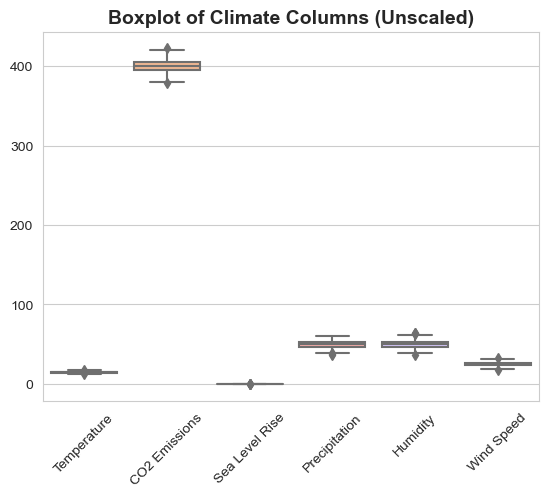

In [23]:
# Get columns needed
climate_columns = climate_data.iloc[:, 1:7]
# Plot boxplots for each column
sns.boxplot(data = climate_columns, palette = "pastel")
# Set title
plt.title('Boxplot of Climate Columns (Unscaled)', fontsize = 14, fontweight = 'bold')
# Rotate to avoid overlap
plt.xticks(rotation = 45)
# Show plot
plt.show()

* `CO2 Emissions` have extremely high values while other factors have low values under 100
* `Sea Level Rise` have lowest values
* We can barely see anything because the scale is very off

### Rescale
* Since columns are scaled differently it is difficult to look at the graph above, I will rescale them

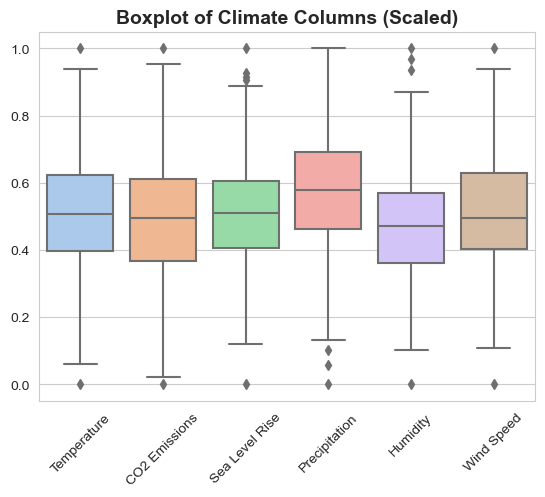

In [24]:
# Initializa scaler
scaler = MinMaxScaler()
# Scale data
climate_columns_scaled = pd.DataFrame(scaler.fit_transform(climate_columns), columns = climate_columns.columns)
# Plot boxplot of columns
sns.boxplot(data = climate_columns_scaled, palette = "pastel")
# Set title
plt.title('Boxplot of Climate Columns (Scaled)', fontsize = 14, fontweight = 'bold')
# Rotate to avoid overlap
plt.xticks(rotation = 45)
# Show plot
plt.show()

* All columns are now scaled the same and we can see that the data is really nice as they look roughly normal
* Although they have longer tails and shorter IQR comparably, the data behaves well and evenly among columns
* The outliers a minimal and not extreme, I believe I could easily work with this data with no further action required

Finally I will convert column `Country` to type `string`

In [25]:
# Convery type of country column to string
climate_data['Country'] = climate_data['Country'].astype('string')
# Check
climate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         243 non-null    string 
 1   Temperature     243 non-null    float64
 2   CO2 Emissions   243 non-null    float64
 3   Sea Level Rise  243 non-null    float64
 4   Precipitation   243 non-null    float64
 5   Humidity        243 non-null    float64
 6   Wind Speed      243 non-null    float64
dtypes: float64(6), string(1)
memory usage: 13.4 KB


# <span style = "color:red;"> ISSUE </span>
* There are some inconsistencies in country names between the two datasets, so I will replace some of the `country` names to make them consistent

In [26]:
# Get list of all country names we need
wine_countries = sorted(wine_data.country.unique())
# Get all countries in climate data
climate_countries = climate_data.Country.unique()
# Loop over countries and get list of country names that are matching and save in list
filtered_climate_countries = []
for country in climate_countries:
    if country in wine_countries:
        filtered_climate_countries.append(country)
# Loop over the list of countries that we need and if country name is different save in list
countries_to_change = []
for country in wine_countries:
    if country not in filtered_climate_countries:
        countries_to_change.append(country)
# Now we can see which countries are stated in different names
countries_to_change

['England', 'Macedonia', 'Slovakia', 'US']

In [27]:
# Change country names so that they are consistent, I looked at the data and found which names climate data had
climate_data = climate_data.replace("United Kingdom", "England")
climate_data = climate_data.replace("North Macedonia", "Macedonia")
climate_data = climate_data.replace("Slovakia (Slovak Republic)", "Slovakia")
climate_data = climate_data.replace("United States of America", "US")

### Step 3:  Identify 3 research questions and perform analysis

Now that you have a better understanding of the data, you will want to form a research question which is interesting to you. The research question should be broad enough to be of interest to a reader but narrow enough that the question can be answered with the data.  Some examples:

* __Too Narrow:__  What is the GDP of the U.S. for 2011?  This is just asking for a fact or a single data point.  

* __Too Broad:__  What is the primary reason for global poverty?  This could be a Ph.D. thesis and would still be way too broad.  What data will you use to answer this question?  Even if a single dataset offered an answer, would it be defendable given the variety of datasets out there?

* __Good:__  Can you use simple sentiment analysis on comments about movies in a movie database to predict its box office earnings?  If you have, or can obtain, data on a variety of movies and you have their box office earnings, this is a question which you can potentially answer well.

__Remember__, this course is for learning Python. You will not be graded on the complexity, accuracy or performance of your analytical methods. However, you are expected to use a Python library, e.g., _scikitlearn_, successfully to generate results and explain why you picked the methods you used.

Some points to note :
1. Make sure that the 3 questions are distinct in terms of the kind of insight provided. For eg. avoid having 3 questions for correlation that only differ by the fields used.
2. You can reach out to the professor or TA to seek feedback on your questions.



# Research Questions
1. **<span style = "color:#ff8c00;"> Can I use sentinent analysis on the wine reviews to explain the quality of the wine? </span>**
2. **<span style = "color:mediumorchid;"> Is there a correlation between country's climate and the quality of wine? </span>**
3. **<span style = "color:lightseagreen;"> What factors can I use to better predict the price of wine? </span>**

### <span style = "color:#ff8c00;"> Objective 1: Can I use sentinent analysis on the wine reviews to explain the quality of the wine? </span>

In [28]:
# Initialize sentinent intensity analyzer
sia = SentimentIntensityAnalyzer()

* Add column `compound` representing the compond polarity score of the description
* I will use both `points` and `price` to represent quality of wine

In [29]:
# Add column compound by using lambda to compute each compound polarity score for the description
wine_data['compound'] = wine_data['description'].apply(lambda x: sia.polarity_scores(x)['compound'])
# Look at head
wine_data.head()

,country,description,points,price,title,compound
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Nicosia 2013 Vulkà Bianco (Etna),0.1531
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Quinta dos Avidagos 2011 Avidagos Red (Douro),0.6486
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Rainstorm 2013 Pinot Gris (Willamette Valley),-0.1280
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,St. Julian 2013 Reserve Late Harvest Riesling ...,0.3400
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,0.8176


### Scatterplot Compound Polarity Score v.s. Points

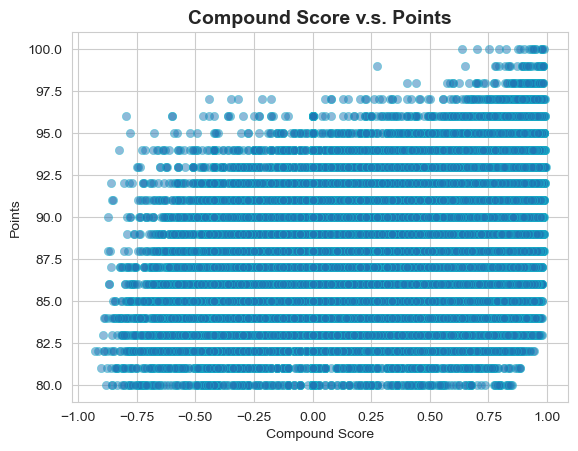

In [30]:
# Plot scatter plot of compound score versus points
axes = sns.scatterplot(data = wine_data, x = "compound", y = "points",
                       color = "tab:blue", edgecolor = "tab:cyan", alpha = 0.5)
# Set labels and titles
axes.set(xlabel = "Compound Score", ylabel = "Points")
plt.title("Compound Score v.s. Points", fontsize = 14, fontweight = "bold")
# Show plot
plt.show()

My initial suggestion of the relationship between `compound` score and `points` were that they will have a positive correlation, it makes sense because using positive words likley mean that the wine testers like the wine, in which they will give high `points` for the wine
* My suggestion was not wrong because we see a general increasing trend, negative `compond` scores are less likely to get highest `points` and nearly perfect positive `compond` scores are less likely to have lowest `points`
* Overall we see a comparably uniform distribution to what I have expected, since low `compound` score may have high `points` and high `compound` score may also have lower `points`
* Something interesting is that we also see negative `compond` scores with high `points`

### Scatterplot: Compound Polarity Score v.s. Price 

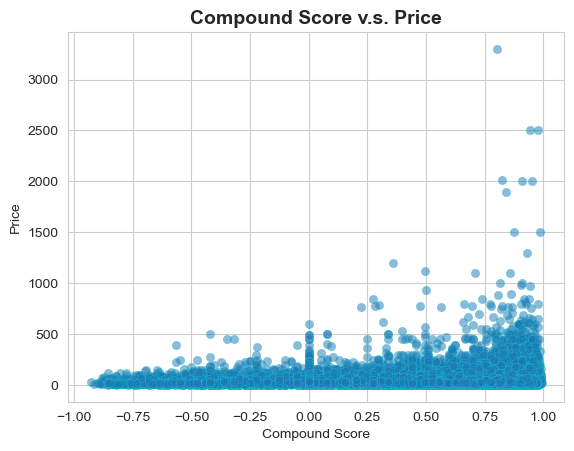

In [31]:
# Plot scatter plot of compound versus price
axes = sns.scatterplot(data = wine_data, x = "compound", y = "price",
                       color = "tab:blue", edgecolor = "tab:cyan", alpha = 0.5)
# Set labels and title
axes.set(xlabel = "Compound Score", ylabel = "Price")
plt.title("Compound Score v.s. Price", fontsize = 14, fontweight = "bold")
# Show plot
plt.show()

My initial thought for the relationship was also that higher `compound` scores would result in higher `price`

* Again my hypothesis was not completely wrong as we see that lower `compound` scores have lower `price`, and the higher `price` wines tend to have higher `compound` scores, showing a roughly exponential form when we look at highest `price` for the `compound` scores range
* Overall we see most dots packed in the bottom because there are less wine that are highly priced, and this makes sense because there are many lower priced wines as they might be easier to make and may take less time than a luxurious wine to make
* However, it is not completely true that high `compound` scores would be representing a high priced wine, we also see many wine with high `compound` scores but are comparably cheaper in price, this also makes sense because not all wine testers have same tastes, cheaper wine also doesn't mean its bad quality, since there are so many variations and types of wine, there are also many preferences and many different tastes

### Scatterplot: Compound Polarity Score v.s. Points with Price as Size

* I will plot outliers seperately in different color so that we could actually see the changes in dot size as well as differentiate between high prices and lower prices, due to there being so much data, it would be difficult to see any interesting trends if all dots were to be the same color, as they would all just stack up

In [32]:
# Calculate IQR of price
iqr = wine_data.price.quantile(0.75) - wine_data.price.quantile(0.25)
# Get upper bound of price
upper = wine_data.price.quantile(0.75) * 1.5
# Get two filtered wine data one with outlier price and one without
wine_filtered = wine_data[wine_data.price < upper]
wine_outliers = wine_data[wine_data.price > upper]

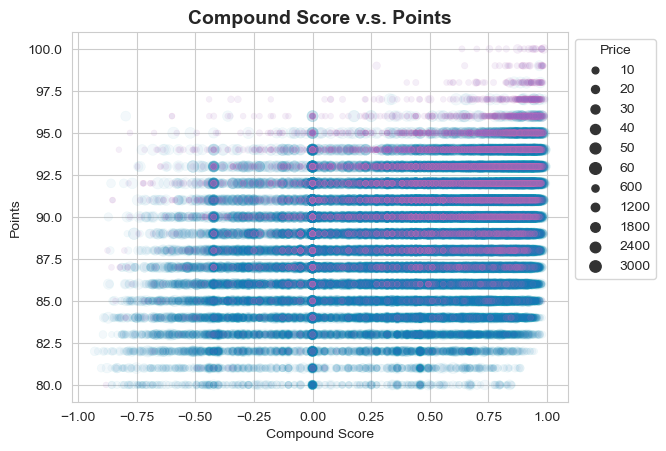

In [33]:
# Plot scatter plot of compound score versus points and price as size
axes = sns.scatterplot(data = wine_filtered, x = "compound", y = "points", size = "price",
                       color = "tab:blue", edgecolor = "tab:cyan", alpha = 0.05)
axes = sns.scatterplot(data = wine_outliers, x = "compound", y = "points", size = "price",
                       color = "tab:purple", edgecolor = "tab:pink", alpha = 0.1)
# Set labels and title and legend location
axes.set(xlabel = "Compound Score", ylabel = "Points")
plt.title("Compound Score v.s. Points", fontsize = 14, fontweight = "bold")
plt.legend(title = 'Price', bbox_to_anchor = (1, 1))
# Show plot
plt.show()

This scatter plot shows `compound` score v.s. `points` with `price` as the size of dots, which shows a more rounded and comprehensive plot combining the previous two plots and including 3 elements in one plot. I chose to use purple for the outliers since there are many high-priced wines, we cannot see the differences if we only use one color. All the purple dots are higher priced than blue dots regardless of size. Within the blue dots, prices range from about 10 to 60 with smallest blue dots at 10 and bigger blue dots at 60. Within the purple dots, the range is from 600 to 3000 where 600 is purple small dots and 3000 is purple big dot.

* We can see similar trends as the previous scatter plots, in fact, this plot combines the characterestics and trends of the previous two plots as well as add more insight by comparing three columns and using colors to differentiate `price`
* Additional information we see is that purple dots seem to fade in at higher point values and higher `compound` scores, we also see that the lighter dots on the top with higher `points` seem to be more dominant in purple color
* An interesting point is that there are many values at `compound` score 0 inclduing both blue dots and purple dots but score of 0 seems to not have higher points compared to other `compond` scores because we see both negative and positive `compound` score have higher `points` than the highest point in `compound` score of 0

### <span style = "color:mediumorchid;"> Objective 2: Is there a correlation between country's climate and the quality of wine? </span>

* Since I am assessing for each `country`, I will be combining the two datasets after both grouping by `country` and then looking at the correlations between each of the two variables \
$\rightarrow$ Therefore it is important to note that
* Not all countries are used because wine data only contained data from certain countries
* Some countries will have many wine data combined into one row because of the groupby function, while other countries might only have a few combined into one row due to the groupby function
* I am using the mean values therefore each wine is represented less in countries with many wine data and each wine is represented more with countries with less wine data, data might also be skewed due to the outliers of wine price
* It is also noteworthy that countries with both high wine score/price and low wine scores/price, would cancel out to a more moderate statistic due to the use of mean \
$\rightarrow$ But I believe it is still relavant and interesting to access the general trends between wine and climate of countries, so even though there might be some skew or some difference in wine representation, it would still show a general trend that we want to see and is interesting to discover

In [34]:
# Group wine data by country and use mean for statistic
wine_country = wine_data.groupby("country").mean()
# Set index of climate data to country for easier join of datasets
climate_country = climate_data.set_index("Country")
# Combine wine and climate datasets with country column
wine_climate = wine_country.join(climate_country)
# Look at head
wine_climate.head()

,points,price,compound,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
country,,,,,,,,,
Argentina,86.710263,24.510117,0.301883,14.432715,401.845994,-0.084401,47.155453,46.854053,19.700578
Armenia,87.500000,14.500000,0.541050,16.055915,397.480868,-0.126306,53.238818,50.679636,24.811014
Australia,88.580507,35.437663,0.464342,15.847275,389.109948,0.145529,60.212414,45.941867,28.371003
Austria,90.101345,30.762772,0.656658,15.069127,400.285884,0.261298,50.252307,52.628879,23.026783
Bosnia and Herzegovina,86.500000,12.500000,0.343550,15.041942,387.271209,0.090777,50.651720,52.852925,25.935375


### Heatmap
* With a heatmap we can see correlation between columns, then we can see if any climate data are correlate with the `points` given on wine, the `price` of wine, and the `compound` score of wine descriptions

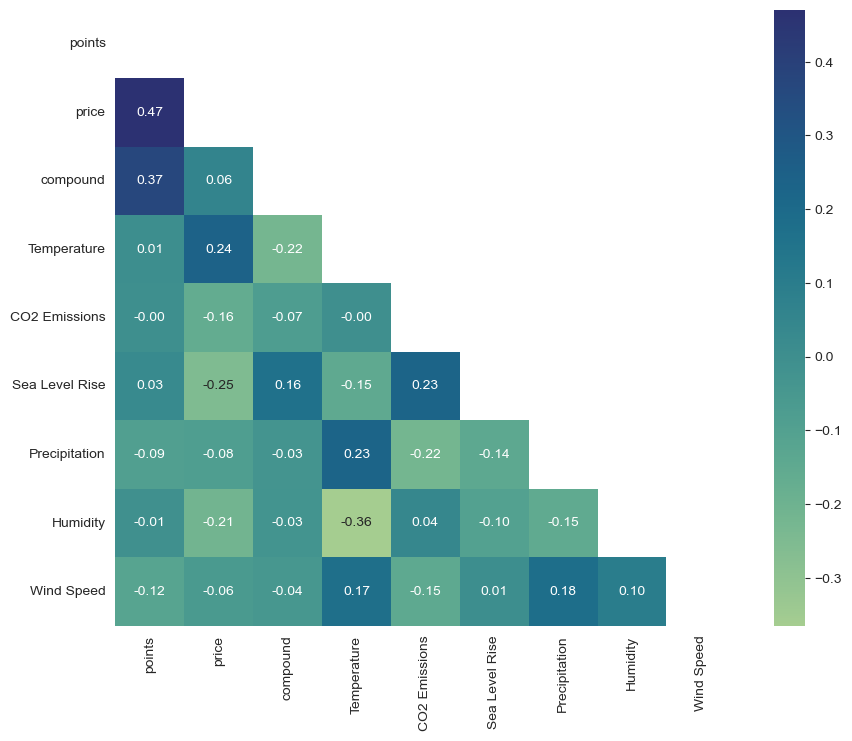

In [35]:
# Get correlations of columns
corr = wine_climate.corr()
# Get matrix so there is only left lower triangle
mat = np.triu(corr)
# Set figure size
plt.figure(figsize = (10, 8))
# Plot heatmap with correlations
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'crest', mask = mat)
# Show plot
plt.show()

* First of all, we only see moderate positive correlation of `points` to `price` with 0.47 and `points` to `compound` with 0.37, therefore it is unresonable to expect a high correlation among wine data and climate
* Second of all, we see no correlation between price and compound, as we see from previous scatterplot that the only parts that seemed to stand out is the high outliers of price

#### Points with climate
* We see that there is no correlation between `points` and climate data \
$\rightarrow$ However, this does not mean that there is no relationship, since my way of assessing the correlation include many problems such as taking the mean of everything, not including all countries, and different representation in wine due the the large difference in wine samples from each country \
$\rightarrow$ But even if there is a correlation I cannot make any conclusions becuase my knowledge and data, as well as my skills are limited

#### Price with climate
* We see that there is some positive correlation between `price` and `temperature` with 0.24 and there is some negative correlation with `price` and `sea level rise` of -0.25 as well as some negative correlation between `price` and `humidity` with -0.21. I cannot make conclusions or assume relationships becuase I don't have enough knowledge and data \
$\rightarrow$ However, to make some kind of conclusion with my limited data and knowledge, I can say with uncertainty that maybe grapes tend to grow tastier in higher temperature, and maybe countries with lower sea level rise have healthier land for grapes, and maybe lands with less moisture tend to grow pricier wine \
$\rightarrow$ Or maybe these correlation could be explained by country's geographical locations and regions along with their habits regarding wine or technology regarding agriculture

#### Compound with climate
* It is interesting to see that there is some positive correlation with `compound` and `sea level rise` with 0.16 and some negaive correlation between `compound` and `temperature` with -0.22 \
$\rightarrow$ Once again I cannot conclude or assume any relationship, however I can guess that maybe when temperatures are low, wine might tend to taste a certain way that are easier described by certain words that might have a more positive connotation, while when temperatures are high, wine might tend to taste a certain way that are easier descirbed by neutral or comparably more negative words \
$\rightarrow$ The positive correlation between `compound` and `sea level rise` supports the hypothesis that "Maybe countries with lower sea level rise have healthier land for grapes." Although I don't have enough data, evidence, and kneoledge to say anything, only to say that there is a possibility.

### <span style = "color:lightseagreen;"> Objective 3: What factors can I use to better predict the price of wine? </span>

* Since price has one missing value, I will remove the row for the algorithm to work

In [36]:
# Remove row with null
wine_climate = wine_climate.dropna()
# Look at columns
wine_climate.columns

Index(['points', 'price', 'compound', 'Temperature', 'CO2 Emissions',
       'Sea Level Rise', 'Precipitation', 'Humidity', 'Wind Speed'],
      dtype='object')

### Backward Stepwise Selection
* Find better columns to include in my algorithm by taking out columns and comparing the rmse
* When all columns included, `rmse` = 11.26
1. Take out each column and record the rmse
2. Take out column if result in least rmse, as marked in green
3. Repeat steps
4. Stop when taking columns out does not decrease rmse

| Column          | RMSE1 | RMSE2 | RMSE3 | RMSE4 | RMSE4 |
| ----------------| ----- | ----- | ----- | ----- | ----- |
| Points          | 12.66 | 11.91 | 10.76 | 9.87  | 10.10 |
| Compound        | 10.93 | 9.23  | 8.24  | 8.15  | 8.30  |
| Temperature     | 10.35 | <span style = "color:lightseagreen;"> 8.06  |       |       |       |
| CO2 Emissions   | <span style = "color:lightseagreen;"> 8.96  |       |       |       |       |
| Sea Level Rise  | 11.75 | 9.16  | 8.26  | 8.00  | 7.94  |
| Precipitation   | 10.19 | 8.80  | 8.14  | <span style = "color:lightseagreen;"> 7.92  |       |
| Humidity        | 11.62 | 9.28  | <span style = "color:lightseagreen;"> 7.99  |       |       |
| Wind Speed      | 11.14 | 8.98  | 8.17  | 7.99  | 7.92  |

#### Columns to Remove
    1. CO2 Emissions
    2. Temperature
    3. Humidity
    4. Precipitation

In [37]:
# Get the data by including only predictive columns that we want
X_data = wine_climate.drop(['price', 'CO2 Emissions', 'Temperature', 'Humidity', 'Precipitation'], axis = 1)
# Obtain label column and save in y
y_target = wine_climate['price']
# Look at data
X_data.head()

,points,compound,Sea Level Rise,Wind Speed
country,,,,
Argentina,86.710263,0.301883,-0.084401,19.700578
Armenia,87.500000,0.541050,-0.126306,24.811014
Australia,88.580507,0.464342,0.145529,28.371003
Austria,90.101345,0.656658,0.261298,23.026783
Bosnia and Herzegovina,86.500000,0.343550,0.090777,25.935375


#### Find Best Way to Standarize Columns
* By comparing the rmse

1. No Scale: 7.924647523578276 
2. Standard: 7.924647523578323 
3. MinMax:   <span style = "color:lightseagreen;"> 7.924647523578313 <span> 
4. Log:      7.924647523578276 
    
* Although there was minor difference, MinMaxScaler resulted in the best result

In [38]:
# Initialzie scaler
scaler = MinMaxScaler()
# Scale columns
X_data = pd.DataFrame(scaler.fit_transform(X_data), columns = X_data.columns)
# Split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2, random_state = 123)

* I see that my research question or method is not the best practice due to the small amount of rows I have
* There are only 34 test data and 9 traning data

In [39]:
# Look at shape of test and train
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(33, 4)
(9, 4)
(33,)
(9,)


* Use Linear Regression to predict wine price

In [40]:
# Initialize linear regression model
Lin_reg = LinearRegression()
# Fit data
regression = Lin_reg.fit(X_train, y_train)
# Predict
predictions = regression.predict(X_test)

* Mean squared error doesn't seem large which is a good thing
* Compared to the range of the target vector, I believe my model is working moderately well

In [41]:
# Find root mean squared error
rmse = math.sqrt(mean_squared_error(predictions, y_test))
rmse

7.924647523578313

In [42]:
min_p = y_target.min()
max_p = y_target.max()
print(min_p)
print(max_p)

9.214285714285714
85.28571428571429


In [43]:
# Print intercept
print('Intercept:', regression.intercept_)

Intercept: 15.741189001474549


In [44]:
# Print coefficients
for i, name in enumerate(X_data.columns):
    print(f'{name:>15}: {Lin_reg.coef_[i]}') 

         points: 42.040782395485174
       compound: -12.088196233186512
 Sea Level Rise: -11.116008058899816
     Wind Speed: 1.4329764487221546


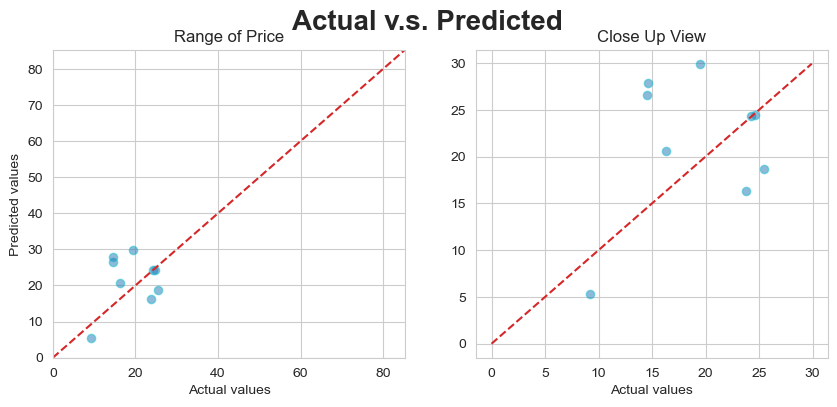

In [45]:
fig, axes = plt.subplots(1, 2, figsize = (10, 4))
# Plot scatter plot
axes[0].scatter(y_test, predictions,
            color = "tab:blue", edgecolor = "tab:cyan", alpha = 0.5)
# Set labels and titles
axes[0].set_xlabel("Actual values")
axes[0].set_ylabel("Predicted values")
axes[0].set_title("Range of Price")
# Plot x = y
axes[0].plot([0, max_p], [0, max_p], color = 'tab:red', linestyle = '--')
# Set x and y ranges
axes[0].set_xlim(0, max_p)
axes[0].set_ylim(0, max_p)
# Plot scatter plot close up
axes[1].scatter(y_test, predictions,
            color = "tab:blue", edgecolor = "tab:cyan", alpha = 0.5)
# Plot x = y
axes[1].plot([0, max(predictions)], [0, max(predictions)], color = 'tab:red', linestyle = '--')
# Set labels and titles
axes[1].set_xlabel("Actual values")
axes[1].set_title("Close Up View")
# Set big title
fig.suptitle("Actual v.s. Predicted", fontsize = 20, fontweight = "bold")
# Show plot
plt.show()

* Due to the small amount of rows I have, I see that my research question is not a well thought one :( \
$\rightarrow$ However, overall my algorithm is working somewhat well
* As we can see the dotted line `x = y` in red, if we predict correctly, the dots should be near the line, we see that most dots are near the line
* Most dots are near the line from a wide view shows that my algorithm is working, however considering that there are many high outliers, our prediction differences would increase in ratio \
$\rightarrow$ When we look at the close up view on the right, this is where vast majority of prices are ranged at, considering that, our model is not as good as expected, which might be due to the outliers

### Step 4:  Present your findings

In this step, you can begin to report your findings.  What did you learn from the data and how do your findings help answer your research question?

This includes following all best practices for presenting your findings that you learnt during the mini-project. The report should be easy to read and inmportant points and explanations clearly highlighted.

__Remember:__ Rarely will a single data analysis conclusively answer a research question.  Here, you need to identify possible limitations.  For example, are your results limited to a certain area, city, or country?  Are you making assumptions about the data which may, or may not, be valid (e.g., that students in one term are equally qualified as students in another)?  Document these limitations in a few paragraphs.


# Summarize Findings

### **<span style = "color:#ff8c00;"> Can I use sentinent analysis on the wine reviews to explain the quality of the wine? </span>**
* Yes to some extent becuase we see a general trend that wine with higher `points` tend to have higher `compound` scores, and wine with higher `price` tend to have higher `compound` scores, as explained by the scatterplots
* Shown best in the scatter plot `compound score v.s. points with price as size`, where purple dots which represents higher price are much more dominant at the top right corner where `compound` score and `points` are both high
* However, as we see from the `heatmap` that the correlation between `points` and `price` is moderate, and between `points` and `compound` is also moderate
* Furthermore, there is no correlation between `compound` and `price` due to the the massive amount of data that is scattered around lower prices and varying compound scores, mostly only the outliers showing high priced data shows the relationship of increasing `compound` with increasing `price`
* We also see a roughly uniform overall shape of `compound v.s. points` which decreases the relationship, as low `compound` scores could also obtain high `points` and the other way around

#### $\rightarrow$ Limitations:
* Points and price are not the only things that can assess the quality of wine
* Testers can have different opinions on wine due to their preferences or other factors, and give different points to the same wine, some tester might tend to give higher points, and other tester might tend to give lower points
* Price may also not be an accurate measure of quality of wine becuase price can be affected by the location, brand and much more

#### $\rightarrow$ Final Thought:
* Sentinent analysis on wine reviews to evaluate the quality of wine may not be the best research question due to the questionable representation of points and price to quality and the reviews with the sentinent of reviews being unpredictable and reviews being able to be affected by many factors as well
* However it was an interesting research question that is worthy getting some insights, after all there was some relationship that was discovered


### **<span style = "color:mediumorchid;"> Is there a correlation between country's climate and the quality of wine? </span>**
* Not really with the heatmap, the highest absolute value of correlation we see is only at `-0.25` between `price` and `Sea Level Rise`, we usually only consider about 0.4 to 0.6 as moderate, therefore correlations below 0.4 are pretty weak in correlation
* Furthermore, most of the wine data paired with climate data showed extremeley weak correlations of below 0.1
* However, considering that the correlations of `points` with `price` and `compound` are already not high, I still tried to make some conclusions with the weak but comparably higher correlation coefficients

#### $\rightarrow$ Limitations:
* While I tried to make some conclusions with the weak correlation coefficients, they are only hypothesis that are very qestionable in reliability due to my lack of knowledge and data, as well as a lack of a good professional approach to the problem since I am only looking at the heapmap
* Some of the hypothesis I made could very largely be caused by other factors such as region, habits, etc instead of an actual relationship between wine and climate
* As mentioned, the wine and climate data were combined and grouped by countries using means, which introduces absense of countries, unfair representation of wines, canceling out of high and low values, and much more

#### $\rightarrow$ Final Thought:
* Again this might not be the best research question and there are many many limintations regarding the data, myself, and apprach
* Overall there is no strong relationship between any of the variables, but with comparably high correlation coefficients I tried to make sense of the numbers, which is interesting and could be plasuible, of course, I need more data and research to conclude in anything

### **<span style = "color:lightseagreen;"> What factors can I use to better predict the price of wine? </span>**
* Though feature analysis, best columns to predict wine price includes `points`, `compound`, `Sea Level Rise`, and `Wind Speed`
* My regression model works moderately, because the `rmse` is not too high compared to the range of values
* But the range of values has many outliers my `rmse` might not be really good

#### $\rightarrow$ Limitations:
* There are only about 40 countries after combining the two datasets which results in few data to train the model and much less data to test the model
* Again I am grouping by country and using means which might cause skews or canceling out of interesting trends
* Aside from limited data and unfair data representation, I might be lacking steps to improve my algorithm due to limited knowledge

#### $\rightarrow$ Final Thought:
* At first glance I thought my algorithm was not working at all, however, the results are not completely bad considering the plot and rsme. I recongnize that with real-world datasets, I cannot expect everything to work well like play data
* Although my algorithm does't work extremeley well, I conducted feature analysis and chose the best standarizing algorithm, in order to maximize performace with the problem at hand
* Again this might not be the best research question to ask or the best approach to solve the problem due to the many limitations, but there was certain valuable insights discovered and some accuracy in the algorithm

# 2. Video

Make a video where you go over each part of the report speaking about the steps you undertook and explaining your work, reasonings, insights and highlighting the important points of the project. You do not need to explain the lines of code (unless you feel it is required).

1. The video should be more than 5 minutes and strictly less than 10 minutes.
2. Both audio and video is required.
3. You can use the zoom to record the video. Start a meeting, start video, start recording and share screen.
4. Make sure your audio is clear before uploading the video to the gradescope.


# Conclusion

* After all this was an interesting project that was done on a topic of my choice, combining wine reviews with country climates
* Although there were many limitations and issues such as with my data, my research questions, or my approach
* There was still interesting trends discovered and probable hypothesis created
* I recognize that it is normal to have issues and limitations especially with real-world datasets
* With this project expereince I can definetly improve next time!